In [2]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
class Visualisations:
    def __init__(self, background_image_path):
        self.image = Image.open(background_image_path).convert("RGB")

    def generate_collision_layer(self, blocked_colors):
        width, height = self.image.size
        pixels = self.image.load()

        collision_layer = np.zeros((height, width), dtype=int)

        for y in range(height):
            for x in range(width):
                if pixels[x, y] in blocked_colors:
                    collision_layer[y, x] = 1  # Mark collision

        return collision_layer

    def save_collision_layer(self, collision_layer, filename):
        np.savetxt(filename, collision_layer, fmt='%d')

    def load_collision_layer(self, filename):
        return np.loadtxt(filename, dtype=int)

    def plot(self, collision_layer):
        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
        plt.title("Collision Layer")
        plt.colorbar(label="Collision (1 = Blocked, 0 = Free)")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()

    def plot_path(self, collision_layer, path, start, goal):
        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  

        if path:
            path_y, path_x = zip(*path)
            plt.plot(path_x, path_y, marker="o", color="blue", markersize=5, linestyle="-", label="Path")

        plt.scatter(start[1], start[0], color="green", s=100, label="Start")  
        plt.scatter(goal[1], goal[0], color="red", s=100, label="Goal")  

        plt.legend()
        plt.title("Pathfinding Visualization")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()


In [4]:
class Star:
    def __init__(self):
        pass  

    def heuristic(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def get_neighbors(self, node, collisions):
        height, width = collisions.shape
        y, x = node  

        neighbors = []
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  

        for dy, dx in directions:
            ny, nx = y + dy, x + dx
            if 0 <= ny < height and 0 <= nx < width and collisions[ny, nx] == 0:
                neighbors.append((ny, nx))

        return neighbors

    def search_path(self, start, goal, collisions):
        open_set = []
        heapq.heappush(open_set, (0, start))  

        came_from = {}
        g_score = {start: 0}
        f_score = {start: self.heuristic(start, goal)}

        while open_set:
            _, current = heapq.heappop(open_set)

            if current == goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.append(start)
                return path[::-1]  

            for neighbor in self.get_neighbors(current, collisions):
                tentative_g_score = g_score[current] + 1  

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

        return None  

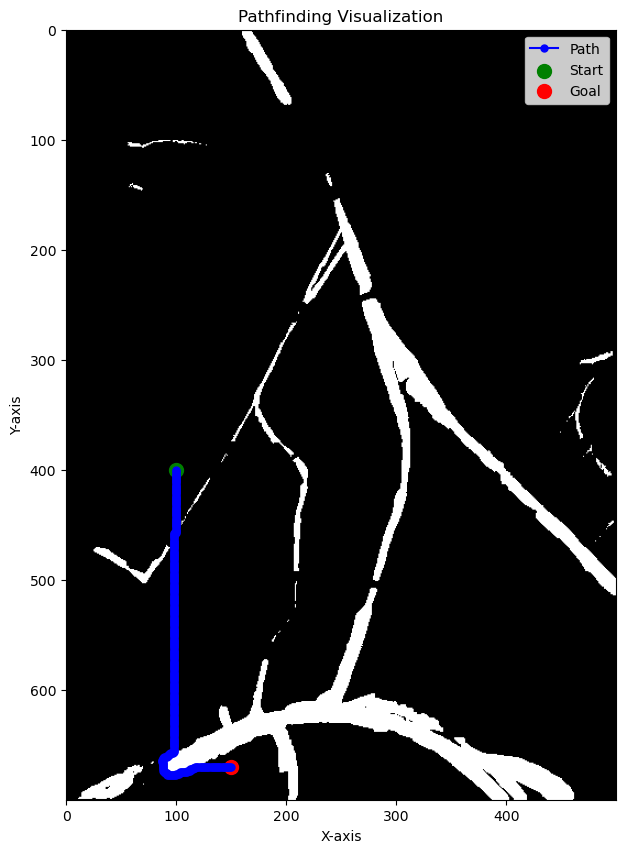

In [5]:
background_image_path = "enviroment_large1.png"
visualizer = Visualisations(background_image_path)

blocked_colors = [(30, 49, 227)]  
collisions = visualizer.generate_collision_layer(blocked_colors)

visualizer.save_collision_layer(collisions, "collision_layer.txt")
loaded_collisions = visualizer.load_collision_layer("collision_layer.txt")

star = Star()
start = (400, 100)  
goal = (670, 150)  
path = star.search_path(start, goal, loaded_collisions)
visualizer.plot_path(loaded_collisions, path, start, goal)